In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 0. 课程大纲

### 0.1 Premitt、Roberts算子
```python
cv.filter2D(img, -1, kernel)
```

### 0.2 Sobel、Scharr算子
```python
cv.Sobel(img, cv.CV_16S, 1, 0, ksize=3)
cv.Scharr(img, cv.CV_64F, 0, 1, ksize=3)
```

### 0.3 Laplacian、LoG算子
```python
cv.Laplacian(img, cv.CV_16S)
```

### 0.4 Canny边缘检测
```python
cv.Canny(img, 20, 200)
```

### 0.5 Canny边缘检测实现

## 5 图像锐化与边缘提取

### 5.1 Prewitt、Roberts算子

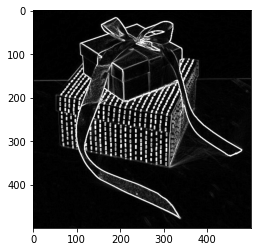

In [8]:
# Prewitt算子
img = cv.imread('pic/gift500x500.jpg', 0)

kx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
ky = np.array([[-1,0, 1], [-1,0, 1], [-1,  0,  1]], dtype=np.float32)

imgx = cv.filter2D(img, cv.CV_16S, kx)
imgy = cv.filter2D(img, cv.CV_16S, ky)

absX = cv.convertScaleAbs(imgx)
absY = cv.convertScaleAbs(imgy)

img_prewitt = cv.add(absX, absY) # np.uint8
show(img_prewitt)

In [13]:
cv.imwrite('pic/gift_premitt_xy.jpg', np.hstack([img, absX, absY, img_prewitt]))

True

In [15]:
# 锐化
img_pre_sharp1 = cv.addWeighted(img, 0.9, img_prewitt, 0.2, 0)
img_pre_sharp2 = cv.add(img, img_prewitt)
cv.imwrite('pic/gift_sharp.jpg', np.hstack([img, img_pre_sharp1, img_pre_sharp2]))

True

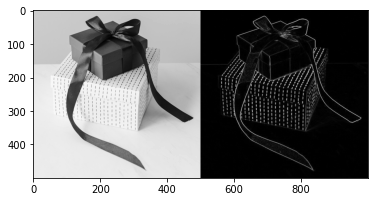

In [11]:
# Roberts算子
img = cv.imread('pic/gift500x500.jpg', 0)

kx = np.array([[-1, 0], [0, 1]], dtype=np.float32)
ky = np.array([[0, -1], [1, 0]], dtype=np.float32)

imgx = np.abs(cv.filter2D(img, cv.CV_16S, kx))
imgy = np.abs(cv.filter2D(img, cv.CV_16S, ky))

img_robert = cv.convertScaleAbs(np.abs(imgx) + np.abs(imgy)) # np.uint8

show(np.hstack([img, img_robert])) 

In [12]:
cv.imwrite('pic/gift_premitt_roberts.jpg', np.hstack([img, img_prewitt, img_robert]))

True

### 5.2.1 Sobel算子

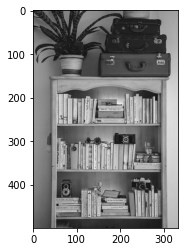

In [16]:
img = cv.imread('pic/bookshelf500x333.jpg', 0)
show(img)

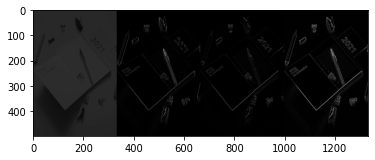

In [66]:
grad_x = cv.Sobel(img, cv.CV_16S, 1, 0, ksize=3)
grad_y = cv.Sobel(img, cv.CV_16S, 0, 1, ksize=3)

grad_xabs = np.abs(grad_x)
grad_yabs = np.abs(grad_y)
grad_xy   = grad_xabs + grad_yabs

show(np.hstack([img, grad_xabs, grad_yabs, grad_xy]))

In [53]:
cv.imwrite("pic/bookshelf_sobel.jpg", np.hstack([img, grad_xabs, grad_yabs, grad_xy]))

True

### 5.2.2 Scharr算子

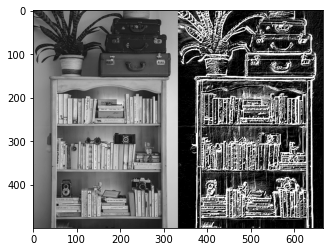

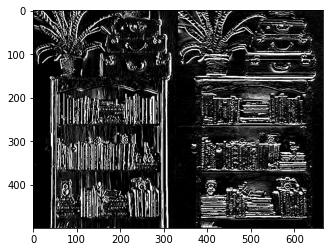

In [29]:
img = cv.imread('pic/bookshelf500x333.jpg', 0)

grad_x = np.abs(cv.Scharr(img, -1, 1, 0))
grad_y = np.abs(cv.Scharr(img, -1, 0, 1))
img_grad = cv.add(grad_x, abs(grad_y))

show(np.hstack([img, img_grad]))
show(np.hstack([grad_x, grad_y]))

### 5.3.1 Laplacian算子

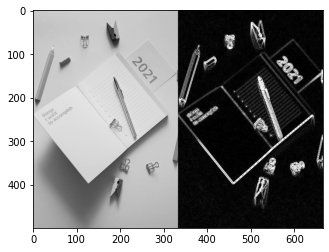

In [33]:
img = cv.imread('pic/notebook500x333.jpg', 0)

img_lap = cv.Laplacian(img, cv.CV_16S, ksize=5, scale=0.2)

img_lap2 = np.abs(img_lap).clip(0, 255)
show(np.hstack([img, img_lap2]))

### 5.3.2 LOG算子

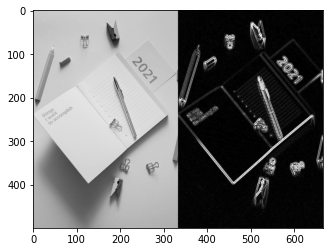

In [32]:
img = cv.imread('pic/notebook500x333.jpg', 0)

img_g = cv.GaussianBlur(img, (3,3), 0)
img_log = cv.Laplacian(img_g, cv.CV_16S, ksize=5, scale=0.2)

img_log2 = np.abs(img_log).clip(0, 255)
show(np.hstack([img, img_log2]))

In [35]:
cv.imwrite('pic/notebook_lap_log.jpg', np.hstack([img, img_lap2, img_log2]))

True

### 5.4 边缘检测——Canny算法

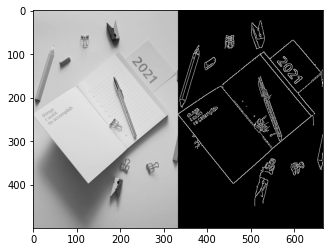

In [39]:
img = cv.imread('pic/notebook500x333.jpg', 0)

img_canny = cv.Canny(img, 20, 200)

show(np.hstack([img, img_canny]))

In [167]:
cv.imwrite('test/landmark_canny.jpg', np.hstack([img, img_canny]))

True

### 5.5 边缘检测实现

In [3]:
img = cv.imread('pic/notebook500x333.jpg', 0)
# Gaussian 滤波
img_blur = cv.GaussianBlur(img, (5,5), 2)
# 梯度
gradx = cv.Sobel(img_blur, cv.CV_64F, 1, 0)
grady = cv.Sobel(img_blur, cv.CV_64F, 0, 1)

T = np.arctan(grady /(gradx + 1e-3))
R = np.abs(gradx) + np.abs(grady)

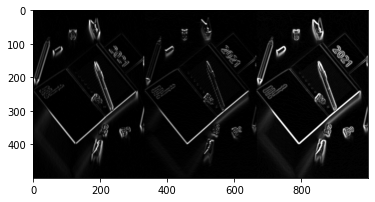

In [4]:
show(np.hstack([np.abs(gradx).clip(0,255), np.abs(grady).clip(0,255), R.clip(0,255)]))

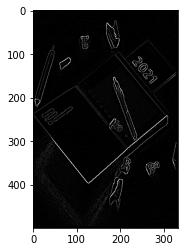

In [6]:
h, w = R.shape

img_thin = np.zeros_like(R, dtype=np.float64)

for i in range(1, h - 1):
    for j in range(1, w - 1):
        theta = T[i,j]
        if -np.pi / 8 <= theta < np.pi / 8:
            if R[i,j] == max([R[i,j], R[i,j-1], R[i,j+1]]):
                img_thin[i,j] = R[i,j]
        elif -3 * np.pi / 8 <= theta < -np.pi / 8:
            if R[i,j] == max([R[i,j], R[i-1,j+1], R[i+1,j-1]]):
                img_thin[i,j] = R[i,j]
        elif np.pi / 8 <= theta < 3 * np.pi / 8:
            if R[i,j] == max([R[i,j], R[i-1,j-1], R[i+1,j+1]]):
                img_thin[i,j] = R[i,j]      
        else:
            if R[i,j] == max([R[i,j], R[i-1,j], R[i+1,j]]):
                img_thin[i,j] = R[i,j]
                
show(np.abs(img_thin).clip(0,255))

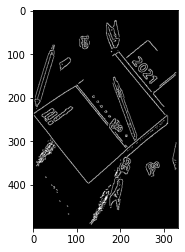

In [7]:
th1 = 5
th2 = 30
maxv = 255

img_edge = np.zeros_like(img_thin)

h, w = img_thin.shape
for i in range(1, h - 1):
    for j in range(1, w - 1):
        if img_thin[i,j] >= th2:
            img_edge[i,j] = maxv
        elif img_thin[i,j] > th1:
            around = img_thin[i-1:i+2, j-1:j+2]
            if around.max() >= th2:
                img_edge[i,j] = maxv
        
show(img_edge)

In [50]:
cv.imwrite('pic/notebook_my_canny.jpg', np.hstack([img, img_canny, img_edge]))

True

In [58]:
R2 = np.abs(R).clip(0,255)
img_thin2 = np.abs(img_thin).clip(0, 255)

cv.imwrite('pic/notebook_mycanny_steps.jpg', np.hstack([img_blur, R2, img_thin2, img_edge]))

True

In [59]:
img_thin.max()

486.0

## Laplacian

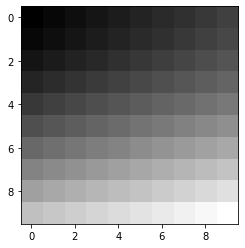

In [127]:
n = 10
img = np.ones((n, n))
for i in range(n):
    for j in range(n):
        img[i,j] = np.power(i,1.5) + j
show(img)